<a href="https://colab.research.google.com/github/Zeknous/Tugas-AI-3/blob/main/Tupro_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Pemrograman 
kelompok 16
* Naufal Abdurrahman Burhani (1301204008)


## Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files


## Read dataset

In [ ]:
traintest = files.upload()
df = pd.read_excel('./traintest.xlsx')
df = df.drop('id', axis=1)

df.head()

Saving traintest.xlsx to traintest.xlsx


,x1,x2,x3,y
0,60,64,0,1
1,54,60,11,0
2,65,62,22,0
3,34,60,0,1
4,38,69,21,0


Count label

1    218
0     78
Name: y, dtype: int64


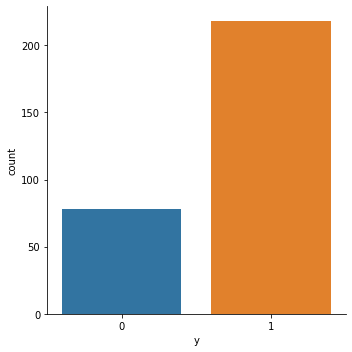

In [ ]:
print(df['y'].value_counts())
sn.catplot(x='y', data=df, kind='count')
plt.show()

In [ ]:
df.describe()

,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000
mean,52.462838,62.881757,4.111486,0.736486
std,10.896367,3.233753,7.291816,0.441285
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,65.250000,5.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


## get x data and y data

In [ ]:
x_data = df.drop('y', axis = 1).to_numpy() # ambil data x1, x2, x3
y_data = df['y'].to_numpy() # ambil data y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1])

## Build model

In [ ]:
class KNN:

    def __init__(self, k): # k-closest data point
        self.k = k
    
    def train_data(self, x, y): # x is matriks and y is label (0, 1)
        self.x_train = x
        self.y_train = y

    def count_range(self, x_test, x_train): # using euclidean distance
        return np.sqrt(np.sum(np.subtract(x_test, x_train))**2)

    def predict(self, x):
        y_predict = []
        for i in range(len(x)):
            prediction = self._prediction(x[i])
            y_predict.append(int(prediction))
        
        return y_predict

    def _prediction(self, x):

        # 1. count range from all training data
        count_range_arr = [self.count_range(x, train_record) for train_record in self.x_train]

        # 2. get label from y_train
        count_range_arr_with_label = np.array([[self.y_train[index], data] for index, data in enumerate(count_range_arr)])

        # 3. sorting count range array
        count_range_arr_with_label = count_range_arr_with_label[count_range_arr_with_label[:, 1].argsort()][:self.k]

        # 4. get only label
        predict_label = [i[0] for i in count_range_arr_with_label]

        # 5. get most common i
        return Counter(predict_label).most_common(1)[0][0]
        

In [ ]:
model = KNN(k=5)
model.train_data(x_train, y_train,)

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(np.array(prediction))
print(len(prediction))

[1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]
74


In [ ]:
print(np.array(y_test))
print(len(y_test))

[0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1]
74


In [ ]:
# accuracy test
def countAccuracy(y_prediction, y_test):
  correct = 0
  for i in range(len(y_prediction)):
    if y_prediction[i] == y_test[i]:
      correct += 1
  
  return correct / float(len(y_test)) * 100.0

In [ ]:
# def confussionMatrix(prediction, test):
#   cfn_matrix = confusion_matrix(y_true=y_test, y_pred=prediction)
#   group_names = ['True Neg','False Pos','False Neg','True Pos']
#   group_counts = ["{0:0.0f}".format(value) for value in cfn_matrix.flatten()]
#   group_percentages = ["{0:.2%}".format(value) for value in cfn_matrix.flatten()/np.sum(cfn_matrix)]
#   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#   labels = np.asarray(labels).reshape(2,2)
#   sn.heatmap(cfn_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
# confussionMatrix(prediction, y_test)

In [ ]:
def confussionMatriks(prediction, test):
  # TP FP
  # FN TN
  true_positive = 0
  true_negative = 0
  false_positive = 0
  false_negative = 0

  for i in range(len(test)):
    if prediction[i] == 1 and test[i] == 1:
      true_positive += 1

    if prediction[i] == 0 and test[i] == 0:
      true_negative += 1
    
    if prediction[i] == 1 and test[i] == 0:
      false_positive += 1
    
    if prediction[i] == 0 and test[i] == 1:
      false_negative += 1
    
  # return [[true_positive, false_positive], [false_negative, true_negative]]
  return {'true_positive': true_positive, 'true_negative': true_negative, 'false_positive': false_positive, 'false_negative': false_negative}

In [ ]:
confussion = confussionMatriks(prediction, y_test)
print(confussion)

{'true_positive': 48, 'true_negative': 2, 'false_positive': 17, 'false_negative': 7}


## Performance measurement

In [ ]:
def recall(confussionMatriks):
  return confussionMatriks['true_positive']/(confussionMatriks['true_positive'] + confussionMatriks['false_negative'])

In [ ]:
def specifity(confussionMatriks):
  return confussionMatriks['true_negative']/(confussionMatriks['true_negative'] + confussionMatriks['false_negative'])

In [ ]:
def precission(confussionMatriks):
  return confussionMatriks['true_positive']/(confussionMatriks['true_positive'] + confussionMatriks['false_positive'])

In [ ]:
def f1Measure(precission, recall):
  return 2 * ((precission * recall) / (precission + recall))

In [ ]:
acc = countAccuracy(prediction, y_test)
print("Accuracy: ", acc, "%")
print("Error rate: ", 100 - acc, "%")

recallValue = recall(confussion)
precissionValue = precission(confussion)
f1ScoreValue = f1Measure(precissionValue, recallValue)

print('Recall: ', recallValue*100, "%")
print('Precission: ', precissionValue*100, "%")
print('F1 Score: ', f1ScoreValue*100, "%")

Accuracy:  67.56756756756756 %
Error rate:  32.432432432432435 %
Recall:  87.27272727272727 %
Precission:  73.84615384615385 %
F1 Score:  80.0 %


In [ ]:
# looping KNN with k 1 - 5
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)
for j in range(1, 6):
  
  model = KNN(k=j)
  model.train_data(x_train, y_train)
  prediction = model.predict(x_test)

  print("K =", j)
  print("Accuracy: ", countAccuracy(prediction, y_test))
  print("=============================================")


K = 1
Accuracy:  64.86486486486487
K = 2
Accuracy:  64.86486486486487
K = 3
Accuracy:  68.91891891891892
K = 4
Accuracy:  64.86486486486487
K = 5
Accuracy:  71.62162162162163


## Data test

In [ ]:
test_df = pd.read_excel('./traintest.xlsx', 'test')
test_df = test_df.drop('id', axis=1)

test_df.head()

,x1,x2,x3,y
0,43,59,2,?
1,67,66,0,?
2,58,60,3,?
3,49,63,3,?
4,45,60,0,?


In [ ]:
test_x_data = test_df.drop('y', axis = 1).to_numpy() # ambil data x1, x2, x3
test_y_data = test_df['y'].to_numpy() # ambil data y

In [ ]:
x_train = x_data
y_train = y_data
x_test  = test_x_data
y_test  = test_y_data

x_test

array([[43, 59,  2],
       [67, 66,  0],
       [58, 60,  3],
       [49, 63,  3],
       [45, 60,  0],
       [54, 58,  1],
       [56, 66,  3],
       [42, 69,  1],
       [50, 59,  2],
       [59, 60,  0]])

In [ ]:
model_test = KNN(k=5)
model_test.train_data(x_train, y_train)
prediction = model_test.predict(x_test)

In [ ]:
print(np.array(prediction))
print(len(prediction))

[1 1 1 1 1 1 1 1 1 1]
10


In [ ]:
x_result = pd.DataFrame(x_test, columns=['x1', 'x2', 'x3'])
y_result = pd.DataFrame(prediction, columns=['y'])
result = pd.merge(x_result, y_result, left_index=True, right_index=True)
result

,x1,x2,x3,y
0,43,59,2,1
1,67,66,0,1
2,58,60,3,1
3,49,63,3,1
4,45,60,0,1
5,54,58,1,1
6,56,66,3,1
7,42,69,1,1
8,50,59,2,1
9,59,60,0,1


In [ ]:
Data_result = pd.ExcelWriter('Data_result.xlsx')
result.to_excel(Data_result)
Data_result.save()